In [ ]:
import pandas as pd
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches
import datetime
import re
import seaborn as sns
import re
import glob

In [ ]:
root = pathlib.Path.home()
directory = os.path.join(root, 'research', "GADS", "Events")
files = glob.glob(directory + "/*.xlsx")

mylist = []
stop_year = 2023


2015
2020
2017
2016
2018
2021
2022
2023


In [24]:
for f in files[:3]:
    year = int(re.findall(r'/home/emco4286/research/GADS/Events/GADS_Events_(\d+)_', f)[0])
    print(year)
    if year > stop_year:
        continue
    else:
        df = pd.read_excel(f, sheet_name="Sheet1")
        df['EventStartDT'] = pd.DatetimeIndex(df['EventStartDT'])
        df.drop(columns=["AmplificationCode", "AmplificationCodeDesc", "NAC_perc", 'EventYearNbr', "ID_SK", 'NERCID_AliasID', 'AliasID'], inplace=True)
        df.set_index(['EventStartDT', "UnitID"], inplace=True)
        if 287 in np.unique(df.index.get_level_values("UnitID")):
            data = df.loc[(slice(None), 287), :]
            mylist.append(data)
        else:
            stop_year = min(stop_year, year)
            continue

2014
2013
2019


In [25]:
merged_data = pd.concat(mylist, axis=0)

In [26]:
merged_data.to_csv('gen_287_2013_2017.csv')

In [27]:
merged_data

,,EventCausesID,EventID,CauseCode,CauseCodeName,ContributionCode,ContributionCodeDesc,UnitTimeZone,WorkDuration,Duration,EventEndDT,EventTypeCode,EventTypeName,NetAvailableCapacityMW_grp,OutageContinuationFlag,OutageContinuationName,UnitTypeCode,UnitTypeCodeName
EventStartDT,UnitID,,,,,,,,,,,,,,,,,
2015-03-18 23:00:00,287,2916458,2188122,0,Reserve shutdown,1,Primary cause of event,CPT,"13 days, 6:00:00","13 days, 6:00:00",2015-04-01 05:00:00,RS,Reserve Shutdown,NaN,0,Start/End current year,100,Fossil-Steam
2015-01-31 18:22:00,287,2916433,2188094,0,Reserve shutdown,1,Primary cause of event,CPT,11:38:00,11:38:00,2015-02-01 06:00:00,RS,Reserve Shutdown,NaN,0,Start/End current year,100,Fossil-Steam
2015-02-01 06:00:00,287,2916434,2188095,0,Reserve shutdown,1,Primary cause of event,CPT,"1 day, 2:29:00","1 day, 2:29:00",2015-02-02 08:29:00,RS,Reserve Shutdown,NaN,0,Start/End current year,100,Fossil-Steam
2015-03-01 06:00:00,287,2916465,2188110,4260,Main stop valves,1,Primary cause of event,CPT,"17 days, 17:00:00","17 days, 17:00:00",2015-03-18 23:00:00,PO,Planned,NaN,0,Start/End current year,100,Fossil-Steam
2015-04-01 05:00:00,287,3118979,2389821,0,Reserve shutdown,1,Primary cause of event,CPT,"19 days, 7:39:00","19 days, 7:39:00",2015-04-20 12:39:00,RS,Reserve Shutdown,NaN,0,Start/End current year,100,Fossil-Steam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-30 23:10:00,287,1901811,1303773,0,Reserve shutdown,1,Primary cause of event,CPT,"1 day, 6:50:00","1 day, 6:50:00",2014-01-01 06:00:00,RS,Reserve Shutdown,NaN,1,Continues into next year,100,Fossil-Steam
2013-10-04 02:00:00,287,1901832,1303703,4560,Generator vibration (excluding vibration due t...,1,Primary cause of event,CPT,"2 days, 5:39:00","2 days, 5:39:00",2013-10-06 07:39:00,SF,Startup Failure,NaN,0,Start/End current year,100,Fossil-Steam
2013-04-26 18:57:00,287,1282560,850099,0,Reserve shutdown,1,Primary cause of event,CPT,02:58:00,02:58:00,2013-04-26 21:55:00,RS,Reserve Shutdown,NaN,0,Start/End current year,100,Fossil-Steam


In [ ]:
pd.merge(df1, df2, left_index=True, right_index=True, how='outer')

In [4]:
mydict = {"RS": 5,
          "PO": 3,
          "U1": 2,
          "SF": 2,
          "MO": 4,
          "PD": 3,
          "A" : 1,
          "F": 2}

# data["EventTypeCode"] = data["EventTypeCode"].map(mydict).values

In [5]:
start_date = datetime.datetime(2012, 12, 1)
end_date = datetime.datetime(2014, 2, 2)

date_range = pd.date_range(start=start_date, end=end_date, freq='min')
state = np.ones(len(date_range))
cause = np.full(len(date_range), 1)

datetimes = data.index.get_level_values("EventStartDT").to_pydatetime()
indexes = [int(i.total_seconds()/60) for i in datetimes - datetime.datetime(2013, 1, 1)]

for k in range(len(indexes)):
    start_time = datetimes[k]
    mytime = data.loc[(datetimes[k], slice(None)), "Duration"].values[0]
    mycause = data.loc[(datetimes[k], slice(None)), "EventTypeCode"].values[0]

    if type(mytime) == datetime.time:
        mytime = datetime.datetime.combine(datetime.datetime.min, mytime) - datetime.datetime.min

    end_time = start_time + mytime

    start_index = np.ravel(np.where(date_range == start_time))[0]
    end_index = np.ravel(np.where(date_range == end_time))[0]

    state[start_index:end_index] = 0
    cause[start_index:end_index] = mydict[mycause]


In [ ]:
new_dataframe = pd.DataFrame(index=date_range,
                             columns=["Minutes"])
new_dataframe["State"] = state
new_dataframe["s_t"] = cause
new_dataframe["s_{t+1}"] = np.concatenate((cause[1:], np.array([1])))
new_dataframe = new_dataframe["2013-01-01":"2014-01-01 00:00"]
new_dataframe["Minutes"] = range(1, 1+len(new_dataframe))

In [11]:
new_dataframe["2013-01-01":"2014-01-01 00:00"]

,Minutes,State,s_t,s_{t+1}
2013-01-01 00:00:00,1,1.0,1,1
2013-01-01 00:01:00,2,1.0,1,1
2013-01-01 00:02:00,3,1.0,1,1
2013-01-01 00:03:00,4,1.0,1,1
2013-01-01 00:04:00,5,1.0,1,1
...,...,...,...,...
2013-12-31 23:56:00,525597,0.0,5,5
2013-12-31 23:57:00,525598,0.0,5,5
2013-12-31 23:58:00,525599,0.0,5,5
2013-12-31 23:59:00,525600,0.0,5,5


In [9]:
cause

array([1, 1, 1, ..., 1, 1, 1])

In [15]:
new_dataframe.to_csv('gen_287_2013_state.csv')

In [13]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

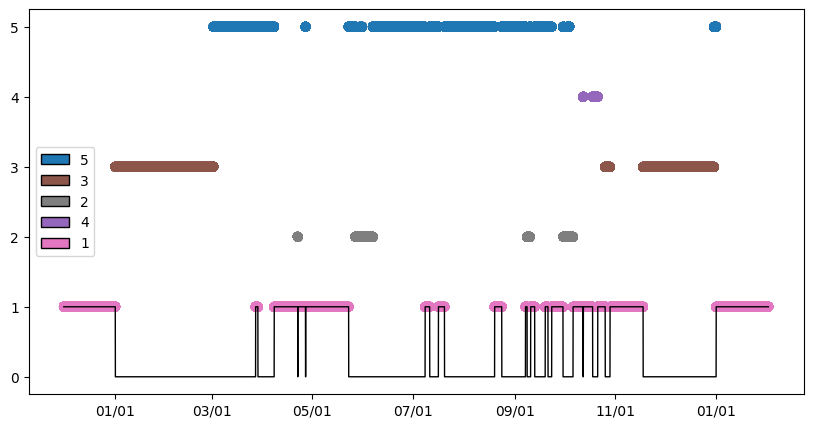

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set_major_formatter(DateFormatter("%m/%d"))

colordict = dict({v:c for v, c in zip(mydict.values(), colors)})

ax.scatter(date_range, cause, c=[colordict[i] for i in cause])
ax.plot(date_range, state, lw=1, c='k')

patches = []
for k, v in colordict.items():
    patches.append(mpatches.Patch(color=v, label=k, ec='k'))
ax.legend(handles=patches, loc="center left")